##**Data cleaning**

###Setup

In [ ]:
import datetime
import re

import numpy as  np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the dataset
df = pd.read_csv("/content/drive/MyDrive/First BYTE Sept 2023/data/byte_store_dataset_2023.csv")
# remove the first unnamed column
df = df.loc[:, df.columns != list(df.columns)[0]]
# print(df.head(10))

###Dropping duplicate data

In [ ]:
# define a reindexing function
def reindex_df(df):
  print(f"Current number of entries is {df[df.columns[0]].size}! Reindexing!")
  new_index = pd.Series(range(df[df.columns[0]].size))
  df.index = new_index

# drop duplicates
df_without_dup = df.drop_duplicates()
print(f"Before removing duplicates: {df[df.columns[0]].size}.\n" +
      f"After removing duplicates: {df_without_dup[df_without_dup.columns[0]].size}.\n")
df = df_without_dup
# reindexing after removal
reindex_df(df)

Before removing duplicates: 61863.
After removing duplicates: 61863.

Current number of entries is 61863! Reindexing!


###Ensure typing

In [ ]:
# ensure typing:
def is_positive_integer(df, col_name):
    return (df[col_name] % 1 == 0).all() and (df[col_name] > 0).all()

def is_positive_float(df, col_name):
    return ((df[col_name].dtype in [np.float16, np.float32, np.float64]) and
            (df[col_name] > 0).all())

# Date is of the format --/--/----
def is_a_valid_time(time):
    timeformat = "%d/%m/%Y"
    try:
        _ = datetime.datetime.strptime(time, timeformat)
        return True
    except:
        return False

print(f"Some Date data are initially invalid; check says: {(df['Date'].apply(is_a_valid_time)).all()}.")
before_size = df[df.columns[0]].size
print(f"Invalid entries are: \n{df[df['Date'].apply(lambda x: (not is_a_valid_time(x)))]}")
df = df[df["Date"].apply(is_a_valid_time)] #removes entries whose Date entry is invalid
print(f"Before removing invalid dates: {before_size}.\n" +
      f"After removing invalid dates: {df[df.columns[0]].size}.\n")
print(f"Date typing is correct now: {(df['Date'].apply(is_a_valid_time)).all()}")

# Customer_ID is positive integer
print(f"Customer_ID typing is correct: {is_positive_integer(df, 'Customer_ID')}")

# Transaction_ID is positive integer
print(f"Transaction_ID typing is correct: {is_positive_integer(df, 'Transaction_ID')}")

# SKU_Category is string and all seemingly equal categories are grouped (no case sensitive, spacing, etc)
print(f"\nAll SKU categories: \n{list(df['SKU_Category'].drop_duplicates().sort_values())}")
print("Are there any SKU categories looking close enough and duplicates of each other (e.g. case sensitive, spaces, etc.)?\n")

# SKU is a string with 5 digit-capital letter
def check_valid_SKU(sku):
    prog = re.compile("[0-9A-Z]{5}")
    return (prog.fullmatch(sku) != None)
print(f"SKU typing is correct: {(df['SKU'].apply(check_valid_SKU)).all()}")

# Quantity is int; and also turn them to integer
print(f"Some Quantity data are initially invalid; check says: {is_positive_integer(df, 'Quantity') and (df['Quantity'].dtype == np.int32)}")
before_size = df[df.columns[0]].size
print(f"Invalid entries are: \n{df[df['Quantity'] % 1 != 0.]}")
df = df[df["Quantity"] % 1 == 0.] #removes entries whose quantity are not integers
df = df.astype({"Quantity" : np.int32})
print(f"Before removing invalid quantity: {before_size}.\n" +
      f"After removing invalid quantity: {df[df.columns[0]].size}.\n")
print(f"Quantity typing is correct now: {is_positive_integer(df, 'Quantity') and (df['Quantity'].dtype == np.int32)}")

# Sales_Amount is positive float
print(f"Sales_Amount typing is correct: {is_positive_float(df, 'Sales_Amount')}")

# Operational_Cost is positive float
print(f"Operational_Cost typing is correct: {is_positive_float(df, 'Operational_Cost')}")

# Customer_Age is positive int
print(f"Customer_Age typing is correct: {is_positive_integer(df, 'Customer_Age')}")

# reindexing after removal
reindex_df(df)

Some Date data are initially invalid; check says: False.
Invalid entries are: 
            Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
9744  29/02/2022         5214            9668      Dresses  BOH1U       1.0   
9745  29/02/2022         5214            9668       Shorts  UHKW8       2.0   
9746  29/02/2022         8810            9669      Dresses  5W5FN       2.0   
9747  29/02/2022         5994            9671        Shoes  4DJ5Q       1.0   
9748  29/02/2022         7453            9674      T-shirt  ZDSYK       1.0   
...          ...          ...             ...          ...    ...       ...   
9894  29/02/2022         8116            9824  Trench coat  5Y4F1       1.0   
9895  29/02/2022         6833            9827       Hoodie  XQBTK       1.0   
9896  29/02/2022         6071            9828      T-shirt  COWU2       1.0   
9897  29/02/2022         6071            9828  Cargo pants  JCYBN       1.0   
9898  29/02/2022         6071            9828      T

###Explore and remove weird entries

####Remove peculiar small values

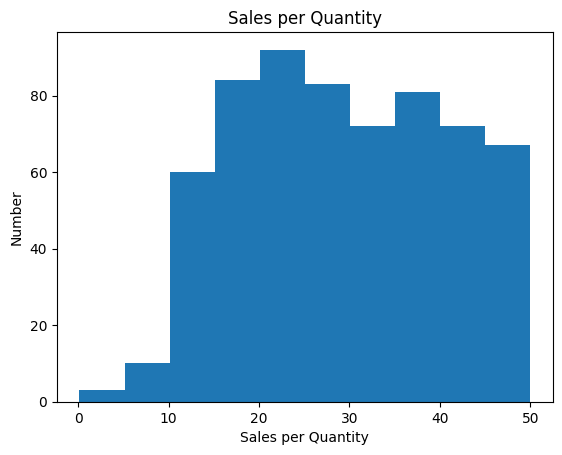

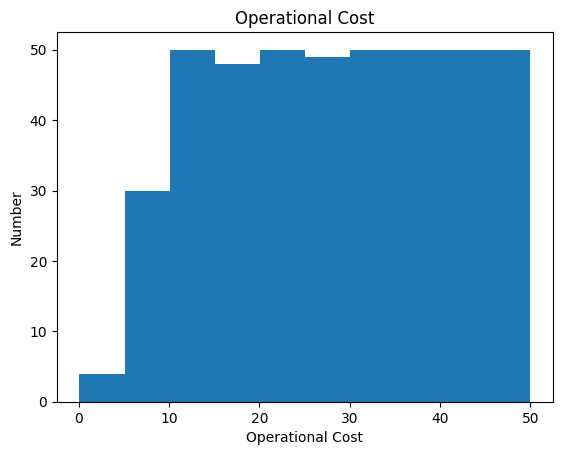

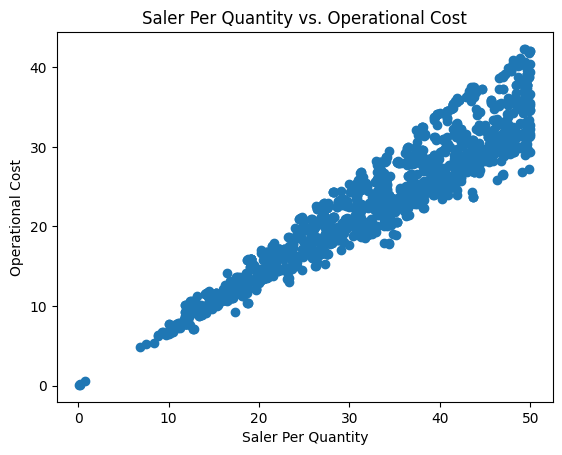

Removing peculiar entries with Sales_Per_Q or Operational_Cost below 3.
Removing entries: 
             Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
25053  27/05/2022        10009           26430       Hoodie  F90L2         1   
27350  10/06/2022         9048           29049        Skirt  LQ555         1   
29252  23/06/2022        14296           31141       Hoodie  F90L2         1   
31674  10/08/2022        15004           38484       Hoodie  F90L2         1   
35370  04/09/2022        16059           42178        Skirt  CZUZX         2   
...           ...          ...             ...          ...    ...       ...   
51859  23/11/2022         3187           57296      T-shirt  GWGFZ         1   
52081  25/11/2022        12479           57492      T-shirt  GWGFZ         1   
52138  25/11/2022        18231           57541        Skirt  UP0YH         1   
52847  29/11/2022        16939           58188      T-shirt  GWGFZ         2   
54648  07/12/2022        1202

In [ ]:
import matplotlib.pyplot as plt

# add Sales_Amount / Quantity, Operational_Cost / Quantity
# and Margin, Margin / Quantity
df["Sales_Per_Q"] = df["Sales_Amount"] / df["Quantity"]
df["Cost_Per_Q"] = df["Operational_Cost"] / df["Quantity"]
df["Margin"] = df["Sales_Amount"] - df["Operational_Cost"]
df["Margin_Per_Q"] = df["Margin"] / df["Quantity"]

# visualize all entries below 50.0
smaller_values_SPQ_df = df[df["Sales_Per_Q"] <= 50.0]
smaller_values_OPC_df = df[df["Operational_Cost"] <= 50.0]

unique_sales_per_q = smaller_values_SPQ_df["Sales_Per_Q"].drop_duplicates()
plt.hist(unique_sales_per_q)
plt.title("Sales per Quantity"); plt.ylabel("Number"); plt.xlabel("Sales per Quantity")
plt.show()

plt.clf()
unique_operational_cost = smaller_values_OPC_df["Operational_Cost"].drop_duplicates()
plt.hist(unique_operational_cost)
plt.title("Operational Cost"); plt.ylabel("Number"); plt.xlabel("Operational Cost")
plt.show()

plt.clf()
non_duplicates = smaller_values_SPQ_df.drop_duplicates(["Sales_Per_Q", "Operational_Cost"])
plt.scatter(non_duplicates["Sales_Per_Q"], non_duplicates["Operational_Cost"])
plt.title("Saler Per Quantity vs. Operational Cost"); plt.xlabel("Saler Per Quantity"); plt.ylabel("Operational Cost")
plt.show()

# we can see peculiar pairs of sales & operational cost below threshold; we remove them
threshold = 3
print(f"Removing peculiar entries with Sales_Per_Q or Operational_Cost below {threshold}.")
before_size = df[df.columns[0]].size
print(f"Removing entries: \n{df[(df['Sales_Per_Q'] <= threshold) | (df['Operational_Cost'] <= threshold)]}")
df = df[(df['Sales_Per_Q'] > threshold) & (df['Operational_Cost'] > threshold)] #removes entires below threshold
print(f"Size before removal: {before_size}; size after removal: {df[df.columns[0]].size}.")

# reindexing after removal
reindex_df(df)

####Remove peculiar large values

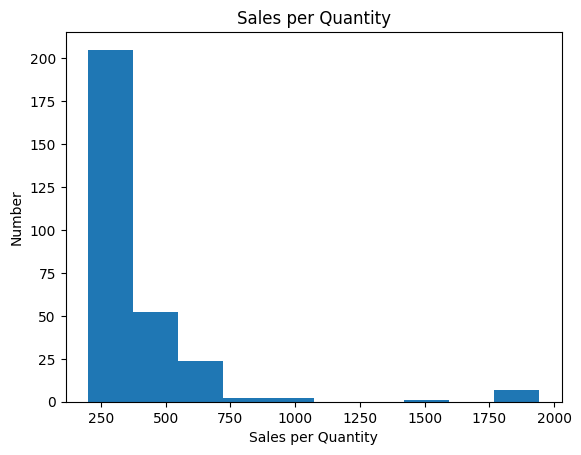

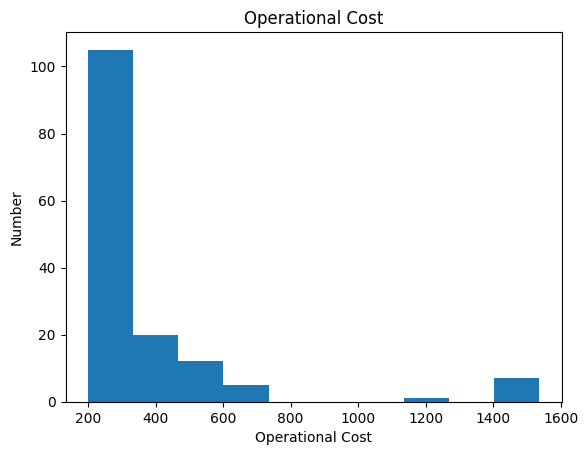

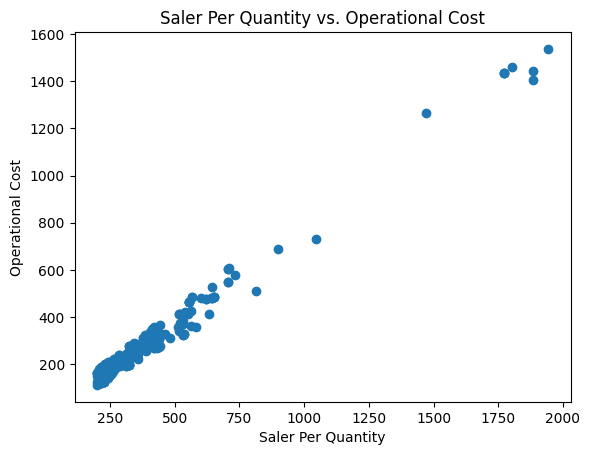

Peculiar entires might be: 
             Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
1443   11/01/2022         5911            1419       Shorts  N8RKP         1   
2743   18/01/2022          551            2607   Sunglasses  BW8YX         1   
2892   19/01/2022         8724            2771   Sunglasses  BW8YX         1   
3740   23/01/2022          266            3597   Sunglasses  2A3WS         1   
5688   05/02/2022         7829            5593   Sunglasses  BW8YX         1   
...           ...          ...             ...          ...    ...       ...   
58613  22/12/2022        17045           63313   Sunglasses  4Y96V         1   
58749  23/12/2022        17094           63457   Sunglasses  36SYR         1   
60240  25/07/2022         1772           36332   Sunglasses  BW8YX         1   
60488  27/07/2022        15904           36571   Sunglasses  BW8YX         1   
60738  29/07/2022        11545           36824   Sunglasses  2A3WS         1   

       Sale

In [ ]:
# visualize all entries above 200
smaller_values_SPQ_df = df[df["Sales_Per_Q"] >= 200.0]
smaller_values_OPC_df = df[df["Operational_Cost"] >= 200.0]

unique_sales_per_q = smaller_values_SPQ_df["Sales_Per_Q"].drop_duplicates()
plt.hist(unique_sales_per_q)
plt.title("Sales per Quantity"); plt.ylabel("Number"); plt.xlabel("Sales per Quantity")
plt.show()

plt.clf()
unique_operational_cost = smaller_values_OPC_df["Operational_Cost"].drop_duplicates()
plt.hist(unique_operational_cost)
plt.title("Operational Cost"); plt.ylabel("Number"); plt.xlabel("Operational Cost")
plt.show()

plt.clf()
non_duplicates = smaller_values_SPQ_df.drop_duplicates(["Sales_Per_Q", "Operational_Cost"])
plt.scatter(non_duplicates["Sales_Per_Q"], non_duplicates["Operational_Cost"])
plt.title("Saler Per Quantity vs. Operational Cost"); plt.xlabel("Saler Per Quantity"); plt.ylabel("Operational Cost")
plt.show()

# we can see peculiar pairs of sales & operational cost below threshold; we remove them
threshold = 1200
print(f"Peculiar entires might be: \n{df[(df['Sales_Per_Q'] >= threshold) | (df['Operational_Cost'] >= threshold)]}")
print("We will not remove them for now.")
# print(f"Removing peculiar entries with Sales_Per_Q or Operational_Cost above {threshold}.")
# before_size = df[df.columns[0]].size
# print(f"Removing entries: \n{df[(df['Sales_Per_Q'] >= threshold) | (df['Operational_Cost'] >= threshold)]}")
# df = df[(df['Sales_Per_Q'] < threshold) & (df['Operational_Cost'] < threshold)] #removes entires below threshold
# print(f"Size before removal: {before_size}; size after removal: {df[df.columns[0]].size}.")

# reindexing after removal
reindex_df(df)

####Show Max and Min

Customer_ID       : max 22625,  min 1.


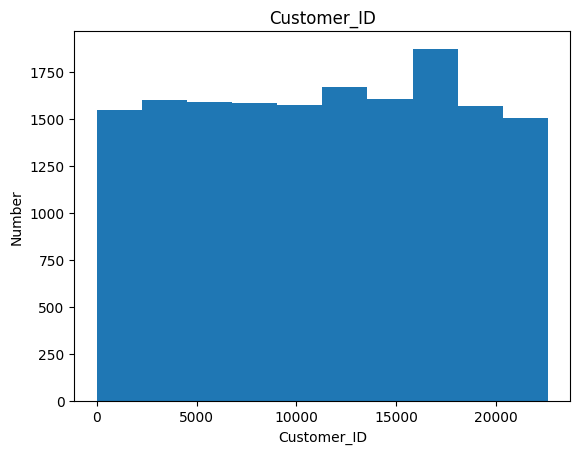

Transaction_ID    : max 64681,  min 3.


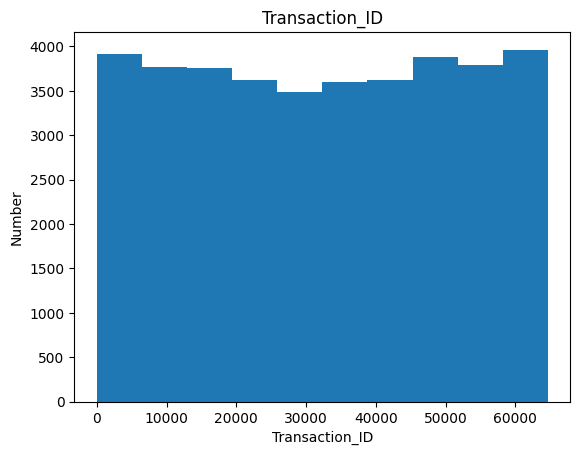

Quantity          : max 20,     min 1.


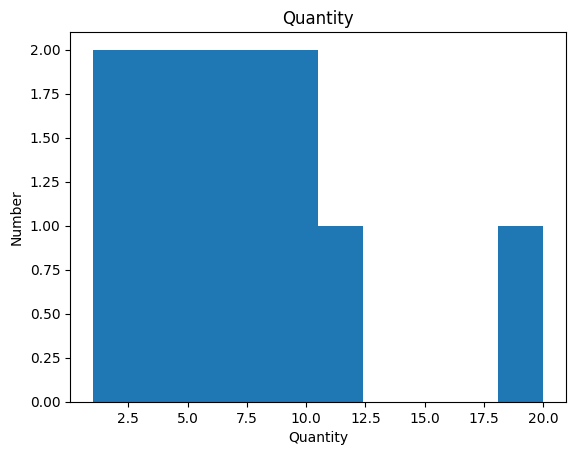

Sales_Amount      : max 2118.3, min 6.800000000000001.


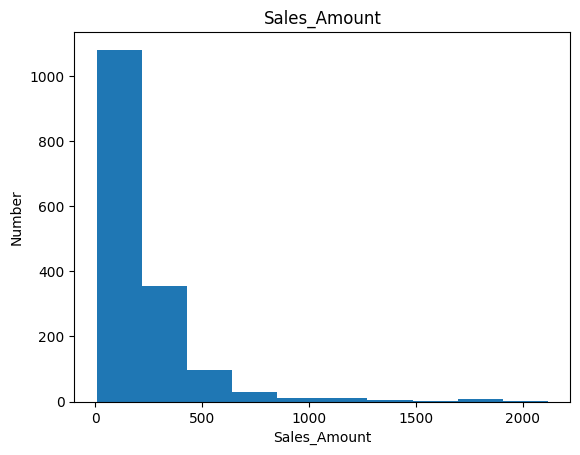

Operational_Cost  : max 1536.1, min 4.9.


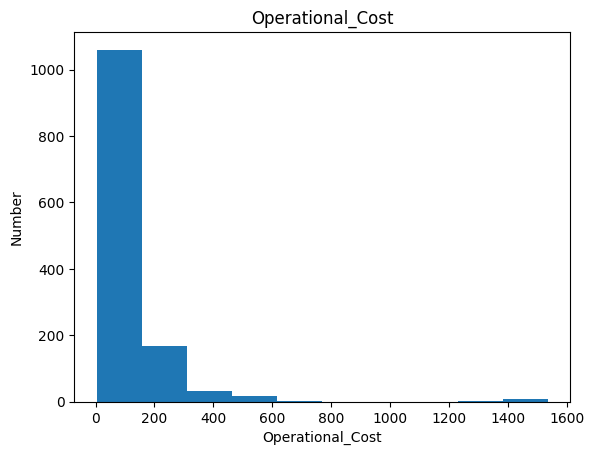

Customer_Age      : max 68,     min 16.


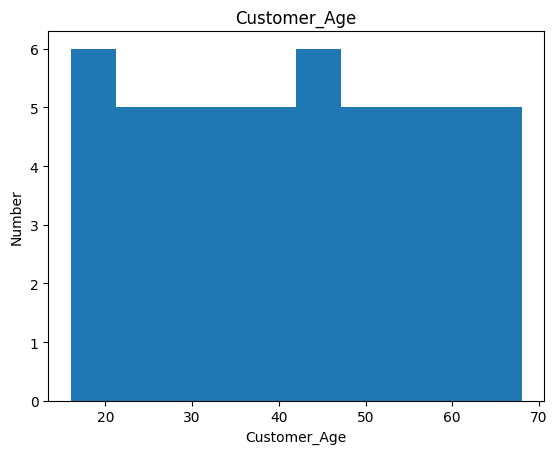

Sales_Per_Q       : max 1942.0, min 6.800000000000001.


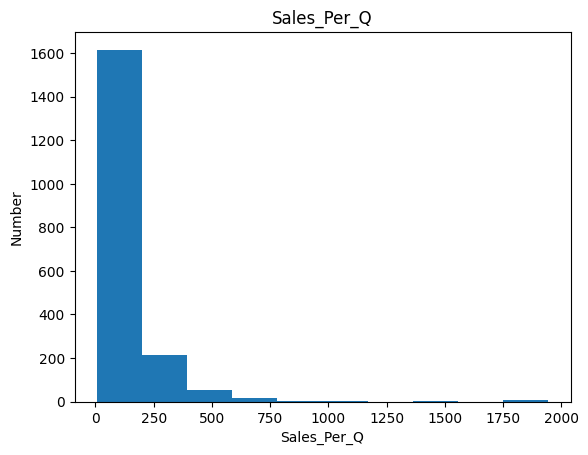

Cost_Per_Q        : max 1536.1, min 1.1.


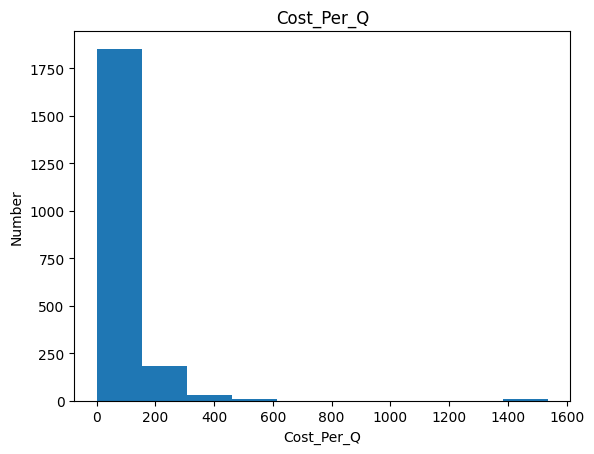

Margin            : max 1513.2000000000003, min 1.700000000000001.


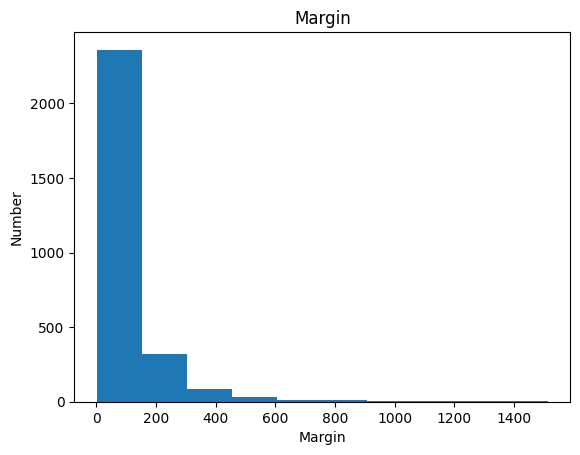

Margin_Per_Q      : max 553.1500000000001, min 1.700000000000001.


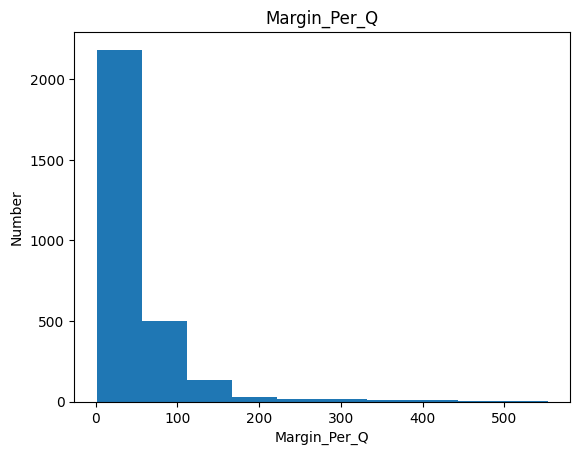

In [ ]:
import matplotlib.pyplot as plt

# show max and minimum Quantity, Sales_Amount, Operational_Cost and Customer_Age
def show_max_and_min(col_name : str):
  print(f"{col_name.ljust(18)}: max {(str(df[col_name].max()) + ',').ljust(7)} min {df[col_name].min()}.")
  plt.clf()
  plt.hist(df[col_name].drop_duplicates())
  plt.title(col_name); plt.xlabel(col_name); plt.ylabel("Number")
  plt.show()

show_max_and_min("Customer_ID")
show_max_and_min("Transaction_ID")
show_max_and_min("Quantity")
show_max_and_min("Sales_Amount")
show_max_and_min("Operational_Cost")
show_max_and_min("Customer_Age")
show_max_and_min("Sales_Per_Q")
show_max_and_min("Cost_Per_Q")
show_max_and_min("Margin")
show_max_and_min("Margin_Per_Q")

###Save new dataset

In [ ]:
from datetime import datetime

creation_time = datetime.now().strftime("%Y_%m_%d_%H_%M")

df.to_csv(f"Byte_Dataset_2023_Cleaned_{creation_time}", sep=',', index=False)

##Exploratory Data Analysis

###Profit over time

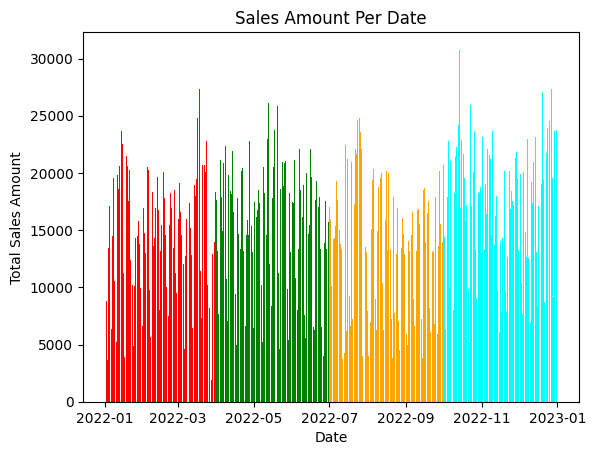

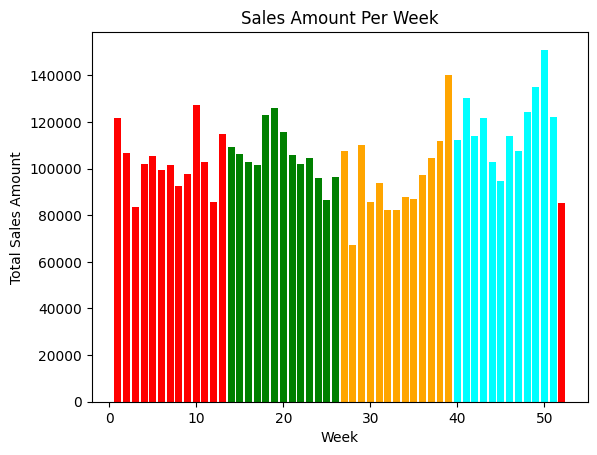

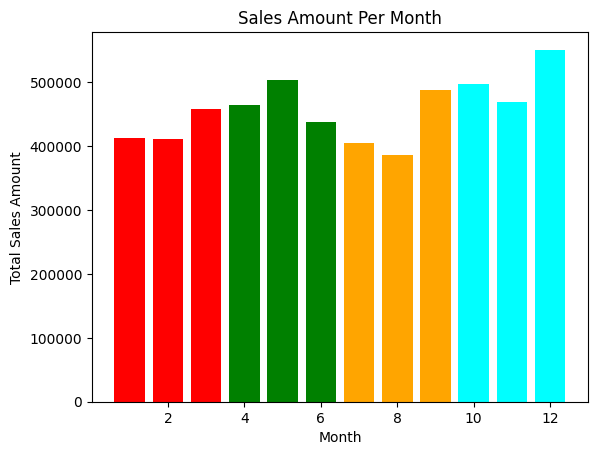

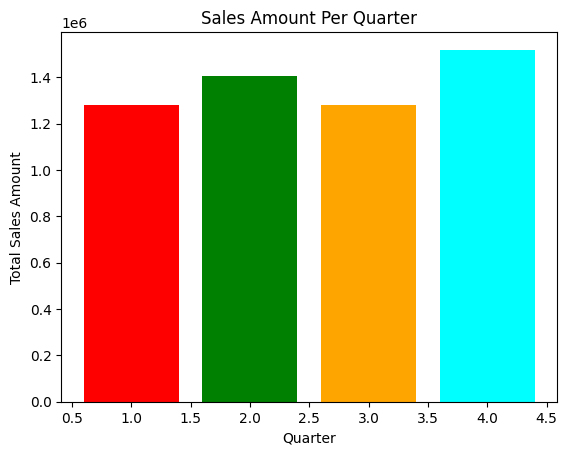

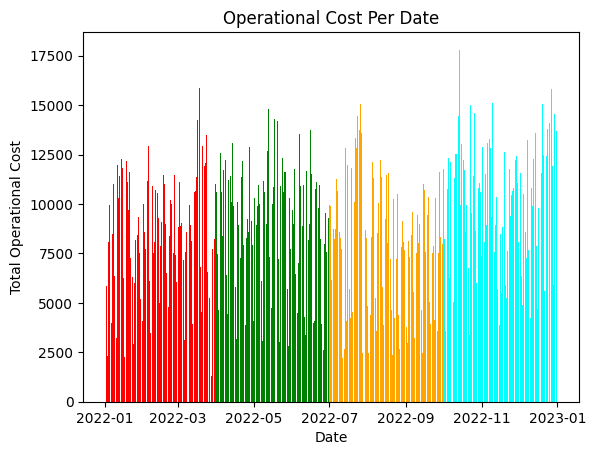

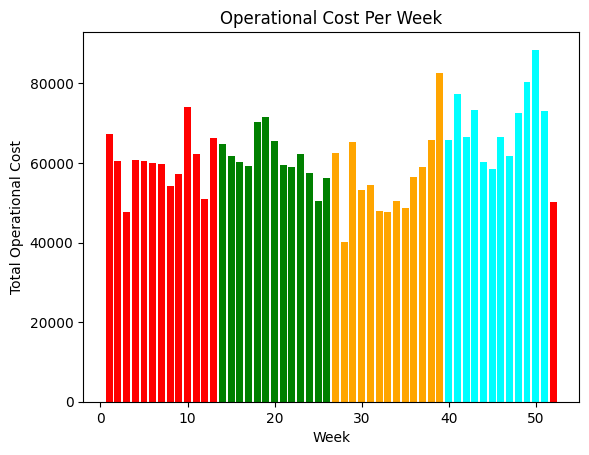

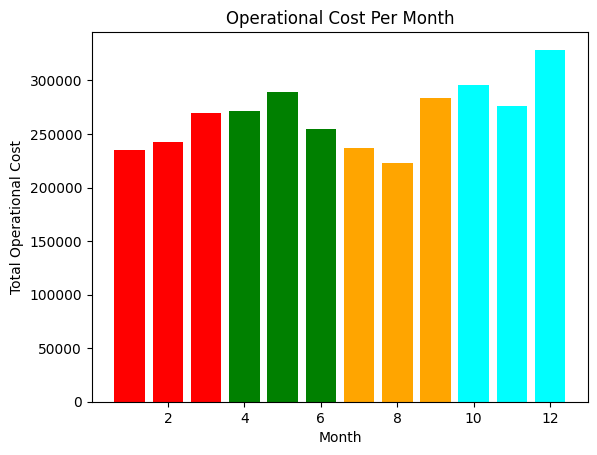

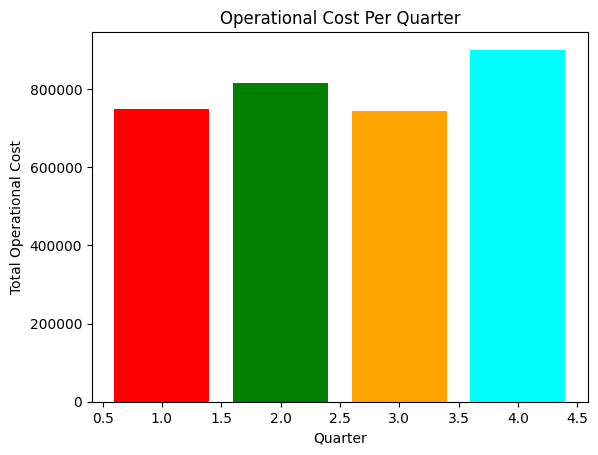

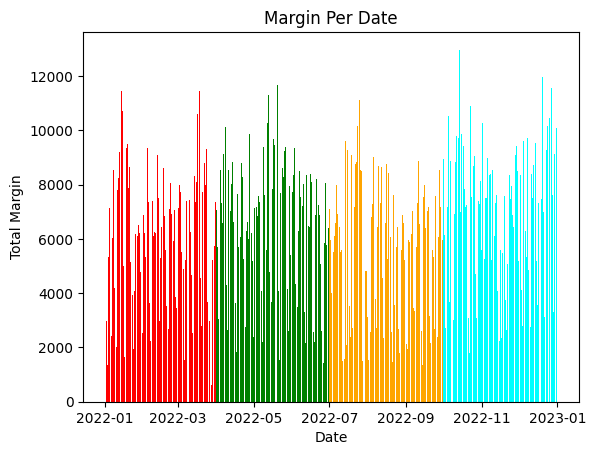

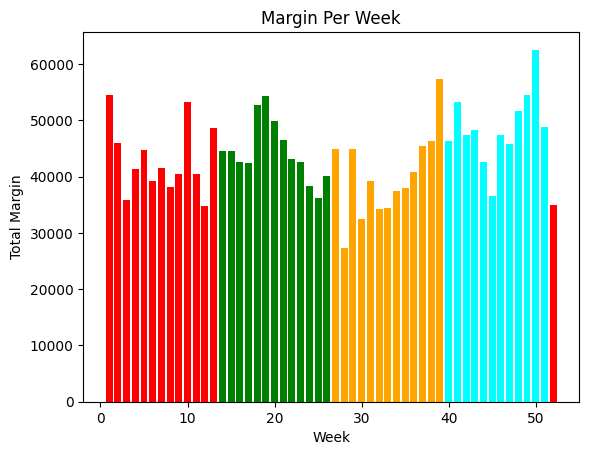

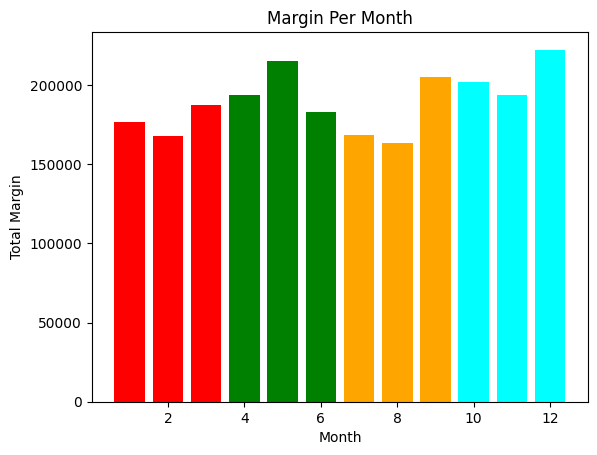

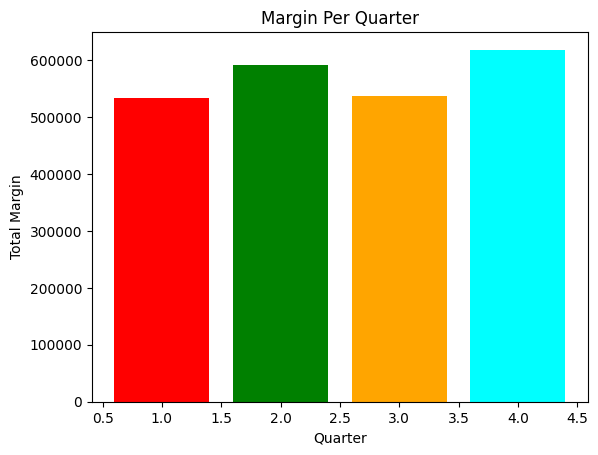

In [ ]:
import matplotlib.pyplot as plt
# first convert date data into pandas datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

def plot_sum_per_date(col_name : str):
  # define a mapping of entries to quarters
  quarters = df["Date"].map(lambda date: date.quarter)
  colors = quarters.map(lambda quarter:
                        {
                            1: "red",
                            2: "green",
                            3: "orange",
                            4: "cyan"
                        }[quarter])

  def plot_bar(dates_with_duplicates, period):
    column_per_period = df.groupby(dates_with_duplicates)[col_name].sum()
    color_per_period = colors.iloc[dates_with_duplicates.drop_duplicates().index.to_list()]


    plt.title(f"{col_name.replace('_', ' ')} Per {period}")
    plt.bar(dates_with_duplicates.drop_duplicates(), column_per_period, color=color_per_period)
    plt.xlabel(period)
    plt.ylabel(f"Total {col_name.replace('_', ' ')}")
    plt.show()

  plot_bar(df["Date"], "Date")
  plot_bar(df["Date"].map(lambda date: date.week), "Week")
  plot_bar(df["Date"].map(lambda date: date.month), "Month")
  plot_bar(quarters, "Quarter")

plot_sum_per_date("Sales_Amount")
plot_sum_per_date("Operational_Cost")
plot_sum_per_date("Margin")

###Analysis on Different Features Per Age Range

####Customer age distribution

Number of unique Customer ID: 16108
Between age 10 and 19: 2919 people
Between age 20 and 29: 4253 people
Between age 30 and 39: 4315 people
Between age 40 and 49: 4005 people


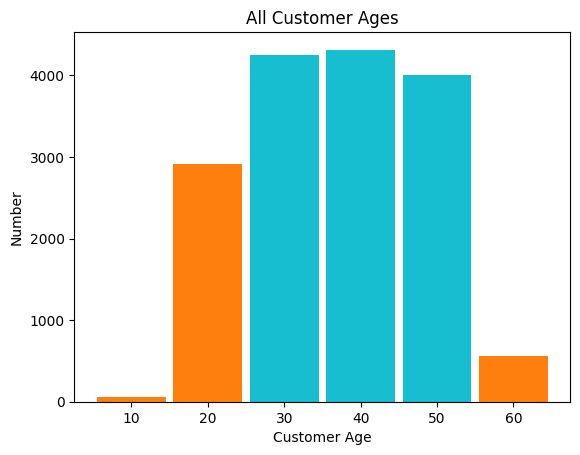

In [ ]:
import matplotlib.pyplot as plt

max_age, min_age = df["Customer_Age"].max(axis=0), df["Customer_Age"].min(axis=0)
age_ranges = range(min_age - (min_age%10), (max_age - (max_age%10)) + 10, 10)

df_no_duplicate_customer = df.drop_duplicates("Customer_ID")
print(f"Number of unique Customer ID: {df_no_duplicate_customer[df_no_duplicate_customer.columns[0]].size}")

# show the distribution of customer ages
plt.clf()
n, _, _ = plt.hist(df_no_duplicate_customer["Customer_Age"],
                   bins=range(age_ranges.start, age_ranges.stop+1, 10))
plt.clf()
weakness_color = "tab:orange"
plt.bar(age_ranges, height=n, width=9, color=[weakness_color]*2 + ["tab:cyan"]*3 + [weakness_color]*1)
print("\n".join([f"Between age {range} and {range+9}: {int(num)} people"
                 for range, num in zip(age_ranges, n[1:-1])]))
plt.title("All Customer Ages"); plt.xlabel("Customer Age"); plt.ylabel("Number")
plt.show()

age_to_number_of_customer = dict(zip(range(10, 71, 10), [int(val) for val in n[1:-1]]))

In [ ]:
print()

['tab:olive', 'tab:olive', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:olive', 'tab:olive']


In [ ]:
age_to_number_of_customer

{10: 59, 20: 2919, 30: 4253, 40: 4315, 50: 4005, 60: 557}

####Quantity, Sales, Operational Cost, Margin & Margin per age range

Examining column 'Quantity'!
Between age 10 and 20: 393, 0.5%.
Between age 20 and 30: 14949, 18.4%.
Between age 30 and 40: 21591, 26.6%.
Between age 40 and 50: 21280, 26.2%.
Between age 50 and 60: 20075, 24.8%.
Between age 60 and 70: 2801, 3.5%.
*Rounded to 1 decimal place.


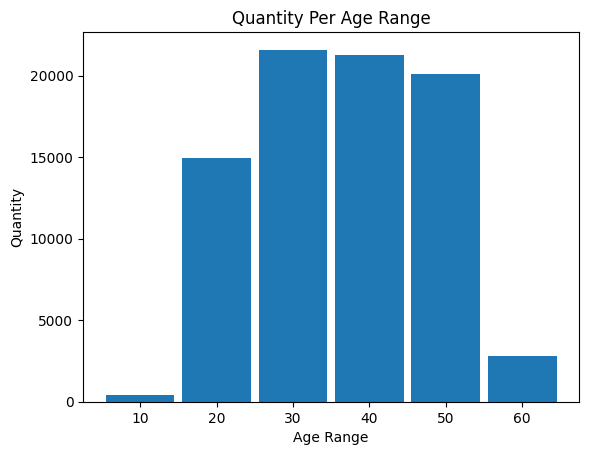

Examining column 'Sales_Amount'!
Between age 10 and 20: 25848.8, 0.5%.
Between age 20 and 30: 1004477.0, 18.3%.
Between age 30 and 40: 1501555.1, 27.4%.
Between age 40 and 50: 1437815.3, 26.2%.
Between age 50 and 60: 1342875.5, 24.5%.
Between age 60 and 70: 174742.0, 3.2%.
*Rounded to 1 decimal place.


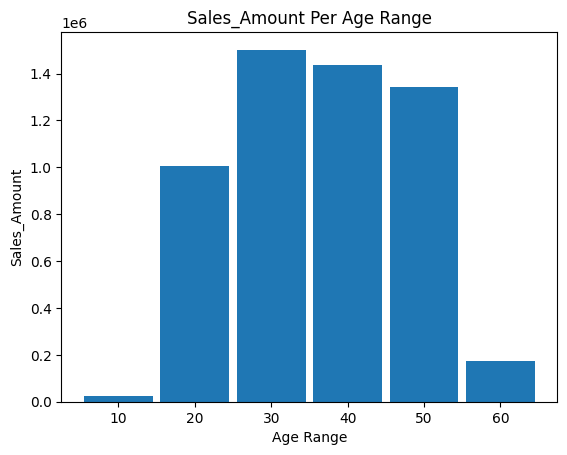

Examining column 'Margin'!
Between age 10 and 20: 11132.1, 0.5%.
Between age 20 and 30: 416779.8, 18.3%.
Between age 30 and 40: 620004.3, 27.2%.
Between age 40 and 50: 602322.2, 26.4%.
Between age 50 and 60: 557259.8, 24.4%.
Between age 60 and 70: 72454.6, 3.2%.
*Rounded to 1 decimal place.


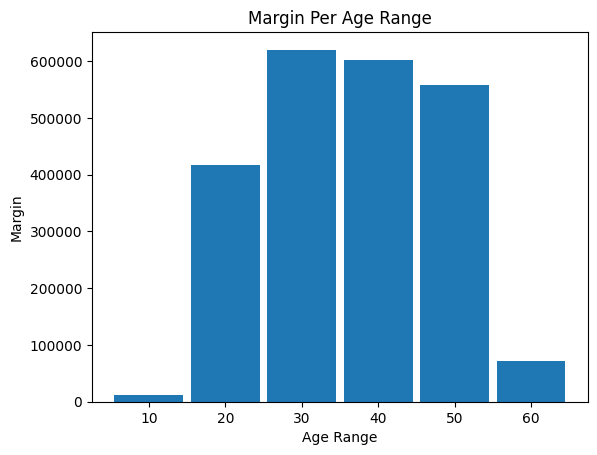

Examining column 'Margin_Per_Q'!
Between age 10 and 20: 7556.9, 0.5%.
Between age 20 and 30: 293123.6, 18.4%.
Between age 30 and 40: 434999.7, 27.3%.
Between age 40 and 50: 419860.7, 26.3%.
Between age 50 and 60: 388340.7, 24.3%.
Between age 60 and 70: 51189.0, 3.2%.
*Rounded to 1 decimal place.


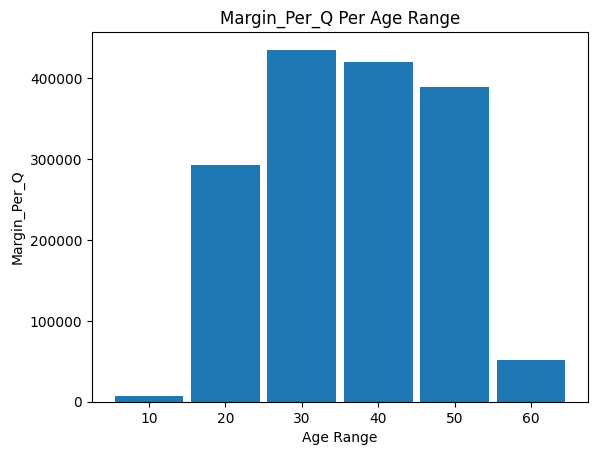

In [ ]:
import matplotlib.pyplot as plt

max_age, min_age = df["Customer_Age"].max(axis=0), df["Customer_Age"].min(axis=0)
age_ranges = range(min_age - (min_age%10), (max_age - (max_age%10)) + 10, 10) #e.g. range(10, 70, 10)

# calculate quantity, sales and operational cost per age distribution
def plot_sum_per_age_range(col_name : str):
  print(f"Examining column '{col_name}'!")
  # get the sum per age range  first
  range_sum = []
  for val in age_ranges:
    range_df = df[df['Customer_Age'].between(val, val+9, inclusive="both")]
    range_sum.append(range_df[col_name].sum())

  plt.clf()
  plt.bar(x=age_ranges, height=range_sum, width=9)
  print("\n".join([f"Between age {range} and {range+10}: {round((num), 1)}, {round((num/sum(range_sum)*100), 1)}%."
                   for range, num in zip(age_ranges, range_sum) ]))
  print("*Rounded to 1 decimal place.")
  plt.title(f"{col_name} Per Age Range"); plt.xlabel("Age Range"); plt.ylabel(col_name)
  plt.show()

plot_sum_per_age_range("Quantity")
plot_sum_per_age_range("Sales_Amount")
plot_sum_per_age_range("Margin")
plot_sum_per_age_range("Margin_Per_Q")

####Quantity, Sales, Operational Cost, Margin & Margin Per Quantity / person, per age range

Examining column 'Quantity'!
Between age 10 and 20: 6.7, 20.9%.
Between age 20 and 30: 5.1, 16.1%.
Between age 30 and 40: 5.1, 15.9%.
Between age 40 and 50: 4.9, 15.5%.
Between age 50 and 60: 5.0, 15.7%.
Between age 60 and 70: 5.0, 15.8%.
*Rounded to 1 decimal place.


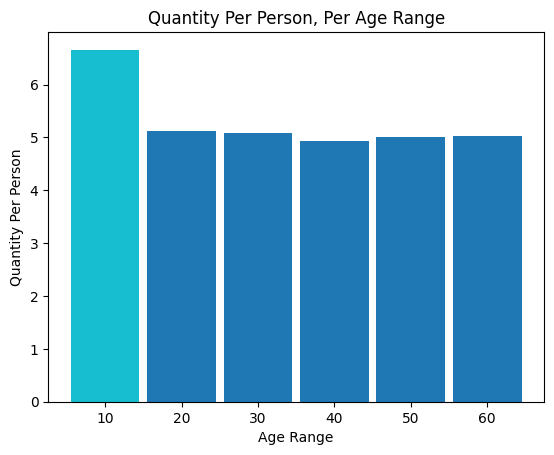

Examining column 'Sales_Amount'!
Between age 10 and 20: 438.1, 20.7%.
Between age 20 and 30: 344.1, 16.3%.
Between age 30 and 40: 353.1, 16.7%.
Between age 40 and 50: 333.2, 15.7%.
Between age 50 and 60: 335.3, 15.8%.
Between age 60 and 70: 313.7, 14.8%.
*Rounded to 1 decimal place.


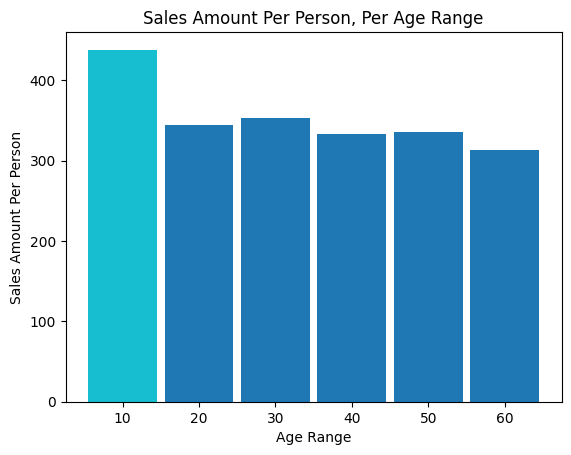

Examining column 'Operational_Cost'!
Between age 10 and 20: 249.4, 20.3%.
Between age 20 and 30: 201.3, 16.3%.
Between age 30 and 40: 207.3, 16.8%.
Between age 40 and 50: 193.6, 15.7%.
Between age 50 and 60: 196.2, 15.9%.
Between age 60 and 70: 183.6, 14.9%.
*Rounded to 1 decimal place.


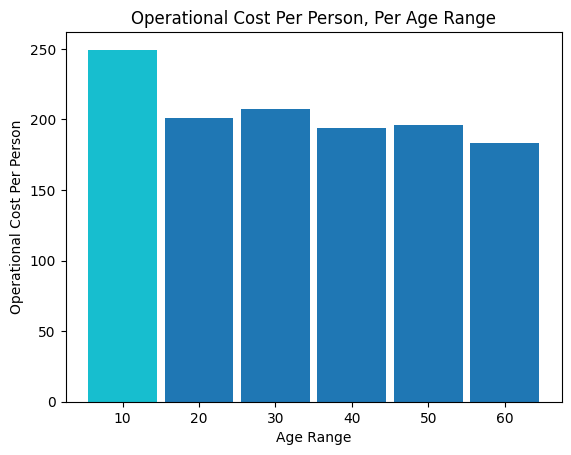

Examining column 'Margin'!
Between age 10 and 20: 188.7, 21.3%.
Between age 20 and 30: 142.8, 16.1%.
Between age 30 and 40: 145.8, 16.5%.
Between age 40 and 50: 139.6, 15.8%.
Between age 50 and 60: 139.1, 15.7%.
Between age 60 and 70: 130.1, 14.7%.
*Rounded to 1 decimal place.


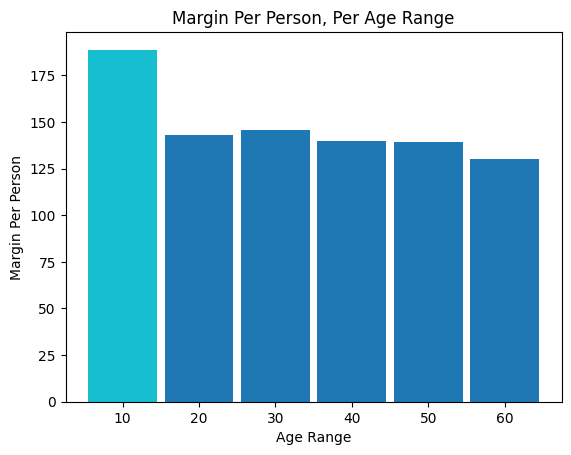

Examining column 'Margin_Per_Q'!
Between age 10 and 20: 128.1, 20.8%.
Between age 20 and 30: 100.4, 16.3%.
Between age 30 and 40: 102.3, 16.6%.
Between age 40 and 50: 97.3, 15.8%.
Between age 50 and 60: 97.0, 15.7%.
Between age 60 and 70: 91.9, 14.9%.
*Rounded to 1 decimal place.


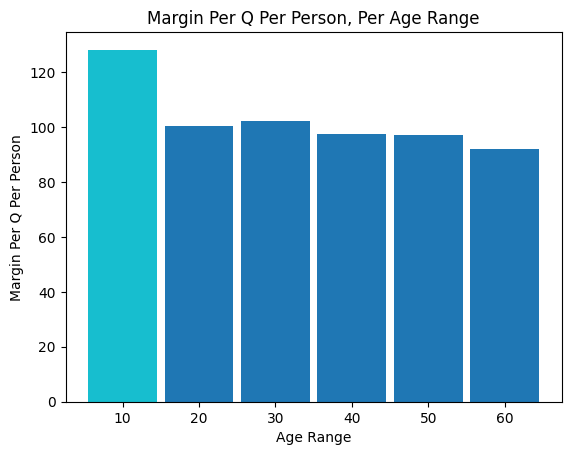

In [ ]:
import matplotlib.pyplot as plt

max_age, min_age = df["Customer_Age"].max(axis=0), df["Customer_Age"].min(axis=0)
age_ranges = range(min_age - (min_age%10), (max_age - (max_age%10)) + 10, 10) #e.g. range(10, 70, 10)

# calculate quantity, sales and operational cost / person, per age distribution
def plot_sum_Per_Person_per_age_range(col_name : str):
  print(f"Examining column '{col_name}'!")
  # get the sum per age range  first
  range_sum_per_person = []
  for val in age_ranges:
    range_df = df[df['Customer_Age'].between(val, val+9, inclusive="both")]
    range_sum_per_person.append(range_df[col_name].sum() / age_to_number_of_customer[val])

  col_name = col_name.replace("_", " ")

  plt.clf()
  plt.bar(x=age_ranges, height=range_sum_per_person, width=9, color=["tab:cyan"] + ["tab:blue"]*(len(age_ranges)-1))
  print("\n".join([f"Between age {range} and {range+10}: {round((num), 1)}, {round((num/sum(range_sum_per_person)*100), 1)}%."
                   for range, num in zip(age_ranges, range_sum_per_person) ]))
  print("*Rounded to 1 decimal place.")
  plt.title(f"{col_name} Per Person, Per Age Range"); plt.xlabel("Age Range"); plt.ylabel(f"{col_name} Per Person")
  plt.show()

plot_sum_Per_Person_per_age_range("Quantity")
plot_sum_Per_Person_per_age_range("Sales_Amount")
plot_sum_Per_Person_per_age_range("Operational_Cost")
plot_sum_Per_Person_per_age_range("Margin")
plot_sum_Per_Person_per_age_range("Margin_Per_Q")

###Analysis of Different Features Per Clothing Category

####SKUs Per SKU Category

We have 1431 unique SKUs put into 15 categories.


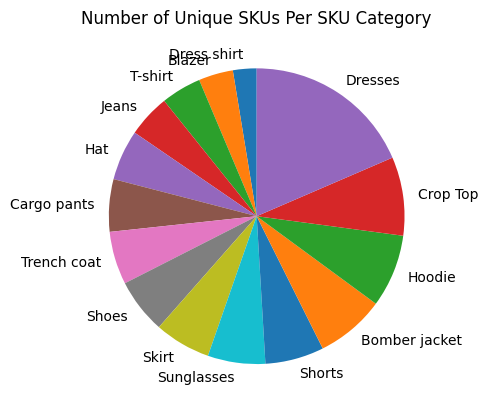

Number of unique SKUs per category.

Dress shirt     37      2.6%.
Blazer          54      3.8%.
T-shirt         63      4.4%.
Jeans           67      4.7%.
Hat             79      5.5%.
Cargo pants     82      5.7%.
Trench coat     83      5.8%.
Shoes           86      6.0%.
Skirt           88      6.1%.
Sunglasses      90      6.3%.
Shorts          92      6.4%.
Bomber jacket   108     7.5%.
Hoodie          114     8.0%.
Crop Top        123     8.6%.
Dresses         265    18.5%.
*Rounded to 1 decimal place.


In [ ]:
import matplotlib.pyplot as plt
# first general SKU & SKU category info
unique_SKUs = list(df["SKU"].drop_duplicates())
unique_SKU_categories = list(df["SKU_Category"].drop_duplicates())
print(f"We have {len(unique_SKUs)} unique SKUs put into {len(unique_SKU_categories)} categories.")

# then plot the number of SKUs per category
size_per_category = []

for category in unique_SKU_categories:
  # 1/ choose SKU category, 2/ get SKU col, 3/ drop duplicates, 4/ get size
  category_unique_SKU_size = df.loc[df["SKU_Category"] == category, ["SKU"]].drop_duplicates().size
  # the way for insertion guarantees an ascending order of SKU values
  idx = 0
  while idx < len(size_per_category) and size_per_category[idx][1] <= category_unique_SKU_size: idx +=1
  size_per_category.insert(idx, (category, category_unique_SKU_size))

categories, sizes = zip(*size_per_category)

plt.clf()
plt.pie(sizes, labels=categories, startangle=90)
plt.title(f"Number of Unique SKUs Per SKU Category")
plt.show()

print("Number of unique SKUs per category.\n")
for category, size in zip(categories, sizes):
  print(f"{category : <15}{size : ^5}{round((size/sum(sizes)*100), 1) : >7}%.")
print("*Rounded to 1 decimal place.")

####Find the top & bottom 300 SKUs for margin and visualize

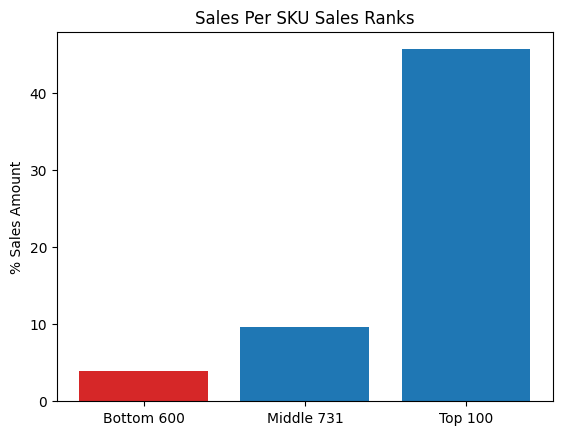

In [ ]:
import matplotlib.pyplot as plt
# group by SKUs and sales, sum and sort ascending order
# take the bottom 300 & top 300 and visualize:
# 1) their categories
# 2) their sales amounts & margins
def analyze_top_and_bottom_300(col_name : str):
  def analyze_by_SKU_category(sku_data, top_or_bottom_and_number):
    col_data = df[df["SKU"].isin(sku_data.index)].groupby("SKU_Category")[col_name].sum().sort_values()
    plt.clf()
    plt.bar(col_data.index, height=col_data / col_data.sum() * 100)
    plt.ylabel("Percentage")
    axs = plt.gca()
    axs.set_xticklabels(col_data.index, rotation=70)

    # plt.pie(col_data, labels=col_data.index, startangle=90)
    plt.title(f"{top_or_bottom_and_number} SKUs, % per Category for {col_name.replace('_', ' ')}")
    plt.show()
    print(col_data)

  df_sale_per_SKU = df.groupby("SKU")[col_name].sum().sort_values()
  top_300 = df_sale_per_SKU[-300:]
  bottom_600 = df_sale_per_SKU[:600]
  # show top 300
  plt.clf()
  plt.bar(range(300), top_300)
  plt.title(f"300 Top SKUs in {col_name}")
  plt.show()
  # show bottom 300
  plt.clf()
  plt.bar(range(600), bottom_600)
  plt.title(f"600 Bottom SKUs in {col_name}")
  plt.show()
  # analyze by SKU category
  analyze_by_SKU_category(sku_data=df_sale_per_SKU, top_or_bottom_and_number="All")
  analyze_by_SKU_category(sku_data=top_300, top_or_bottom_and_number="Top 300")
  analyze_by_SKU_category(sku_data=bottom_600, top_or_bottom_and_number="Bottom 600")

def show_sales_per_SKU_for_bottom_mid_top():
  df_sale_per_SKU = df.groupby("SKU")["Sales_Amount"].sum().sort_values()
  top_size, bottom_size = 100, 600
  top = df_sale_per_SKU[-top_size:]
  middle_entries = df_sale_per_SKU[top_size:-bottom_size]
  bottom = df_sale_per_SKU[:bottom_size]
  # plot bar graph for each range
  plt.clf()
  plt.bar([f"Bottom {bottom_size}", f"Middle {middle_entries.size}", f"Top {top_size}"],
          height=[bottom.sum()/df_sale_per_SKU.sum()*100,
                  middle_entries.sum()/df_sale_per_SKU.sum()*100,
                  top.sum()/df_sale_per_SKU.sum()*100],
          color=["tab:red", "tab:blue", "tab:blue"])
  plt.title(f"Sales Per SKU Sales Ranks")
  plt.ylabel("% Sales Amount")
  plt.show()

# analyze_top_and_bottom_300("Margin")
# analyze_top_and_bottom_300("Sales_Amount")
# analyze_top_and_bottom_300("Quantity")

show_sales_per_SKU_for_bottom_mid_top()

####Quantity, Sales Amount, Operational Cost, Margin and Margine Per Quantity per Clothing Category

Examining column 'Quantity'!


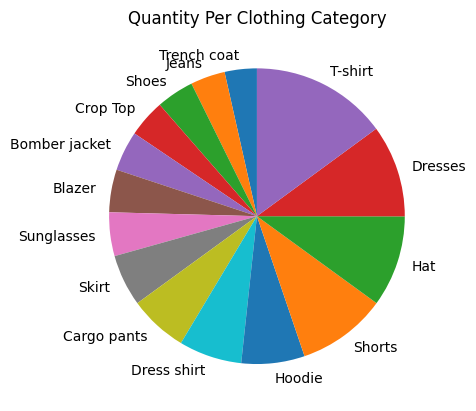

Trench coat    2854     3.5%.
Jeans          3071     3.8%.
Shoes          3335     4.1%.
Crop Top       3345     4.1%.
Bomber jacket  3541     4.4%.
Blazer         3783     4.7%.
Sunglasses     3873     4.8%.
Skirt          4584     5.7%.
Cargo pants    5193     6.4%.
Dress shirt    5586     6.9%.
Hoodie         5610     6.9%.
Shorts         7929     9.8%.
Hat            8098    10.0%.
Dresses        8181    10.1%.
T-shirt        12106   14.9%.
*Rounded to 1 decimal place.
Examining column 'Sales_Amount'!


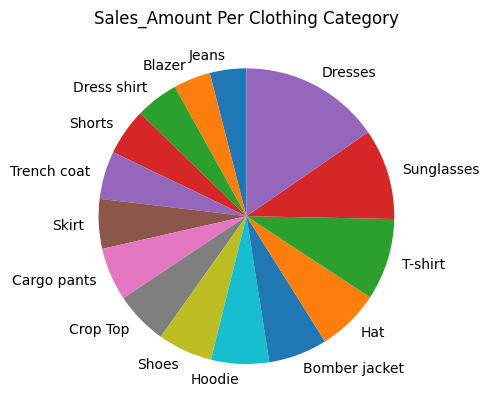

Jeans          218854.0    4.0%.
Blazer         222557.6    4.1%.
Dress shirt    258056.2    4.7%.
Shorts         281326.2    5.1%.
Trench coat    287984.0    5.2%.
Skirt          297866.2    5.4%.
Cargo pants    318518.4    5.8%.
Crop Top       318938.2    5.8%.
Shoes          328233.7    6.0%.
Hoodie         347434.3    6.3%.
Bomber jacket  353239.5    6.4%.
Hat            375525.1    6.8%.
T-shirt        490319.5    8.9%.
Sunglasses     543799.4    9.9%.
Dresses        844661.4   15.4%.
*Rounded to 1 decimal place.
Examining column 'Operational_Cost'!


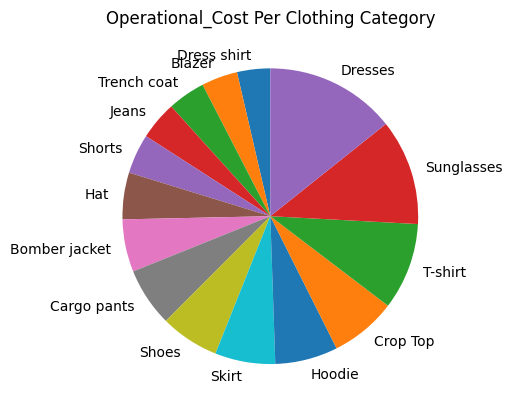

Dress shirt    116230.8    3.6%.
Blazer         126782.5    4.0%.
Trench coat    131869.5    4.1%.
Jeans          134946.4    4.2%.
Shorts         139377.4    4.3%.
Hat            163637.0    5.1%.
Bomber jacket  184517.7    5.8%.
Cargo pants    206020.1    6.4%.
Shoes          206300.1    6.4%.
Skirt          211318.1    6.6%.
Hoodie         220023.8    6.9%.
Crop Top       232579.1    7.3%.
T-shirt        304730.4    9.5%.
Sunglasses     370952.0   11.6%.
Dresses        458076.0   14.3%.
*Rounded to 1 decimal place.
Examining column 'Margin'!


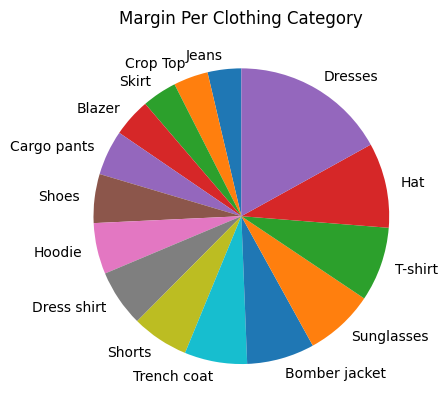

Jeans          83907.6    3.7%.
Crop Top       86359.1    3.8%.
Skirt          86548.1    3.8%.
Blazer         95775.1    4.2%.
Cargo pants    112498.3    4.9%.
Shoes          121933.6    5.3%.
Hoodie         127410.5    5.6%.
Dress shirt    141825.4    6.2%.
Shorts         141948.8    6.2%.
Trench coat    156114.5    6.8%.
Bomber jacket  168721.8    7.4%.
Sunglasses     172847.4    7.6%.
T-shirt        185589.1    8.1%.
Hat            211888.1    9.3%.
Dresses        386585.4   17.0%.
*Rounded to 1 decimal place.
Examining column 'Margin_Per_Q'!


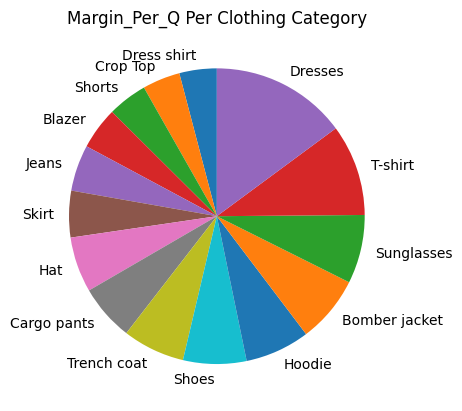

Dress shirt    65239.0    4.1%.
Crop Top       65740.2    4.1%.
Shorts         69001.5    4.3%.
Blazer         73826.4    4.6%.
Jeans          80701.5    5.1%.
Skirt          81237.6    5.1%.
Hat            96632.5    6.1%.
Cargo pants    97930.6    6.1%.
Trench coat    108429.0    6.8%.
Shoes          110400.6    6.9%.
Hoodie         112897.7    7.1%.
Bomber jacket  116699.4    7.3%.
Sunglasses     119686.7    7.5%.
T-shirt        159382.5   10.0%.
Dresses        237265.4   14.9%.
*Rounded to 1 decimal place.


In [ ]:
import matplotlib.pyplot as plt
# get the unique sku categories first
unique_SKU_categories = list(df["SKU_Category"].drop_duplicates())

# calculate column per clothing category
def plot_sum_per_clothing_category(col_name : str):
  print(f"Examining column '{col_name}'!")
  sum_per_category = []
  for category in unique_SKU_categories:
    # get the sum
    sum_in_category = df.loc[df['SKU_Category'] == category, col_name].sum()
    # the way for insertion guarantees an ascending order of sum values
    idx = 0
    while idx < len(sum_per_category) and sum_per_category[idx][1] <= sum_in_category: idx +=1
    sum_per_category.insert(idx, (category, sum_in_category))
  # get the categories and sums as sorted lists
  categories, sums = zip(*sum_per_category)
  # plot the result
  plt.clf()
  plt.pie(sums, labels=categories, startangle=90)
  plt.title(f"{col_name} Per Clothing Category")
  plt.show()
  # print the different sums
  for category, s in zip(categories, sums):
    print(f"{category : <15}{round(s, 1) : ^5}{round((s/sum(sums)*100), 1) : >7}%.")
  print("*Rounded to 1 decimal place.")

plot_sum_per_clothing_category("Quantity")
plot_sum_per_clothing_category("Sales_Amount")
plot_sum_per_clothing_category("Operational_Cost")
plot_sum_per_clothing_category("Margin")
plot_sum_per_clothing_category("Margin_Per_Q")